In [1]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_player = pd.read_csv('matrix_Player_6_game_1.csv')
df_player = df_player.fillna(0)

In [3]:
print(df_player.loc[:2000, ['frameRotationalSpeedX', 'wheelRotationalSpeedX']])

      frameRotationalSpeedX  wheelRotationalSpeedX
0                  -0.28000                0.70000
1                  -0.35000                0.82250
2                  -0.33444                0.77000
3                  -0.28000                0.88375
4                  -0.30100                0.77000
...                     ...                    ...
1996               -0.35000                0.78750
1997               -0.35000                0.73500
1998               -0.28000                0.74375
1999               -0.21778                0.80111
2000               -0.28000                0.87500

[2001 rows x 2 columns]


In [4]:
sprints = [0]*770883 #make an array of 770883 empty values
for i in range(770883) :
    spd = df_player.loc[i,'frSpeed'] #almaceno datos del dataset, en la posición x para la columna frSpeed en spd
    acc = df_player.loc[i,'frAcc'] #almaceno datos del dataset, en la posición x para la columna frSpeed en spd
    if spd > 1 and acc > 10 :#si la velocidad es >3 y acc>10 isSprinting
        sprints[i] = 1#if value is 1 its sprinting if it isnt its not sprinting

df_player["IsSprinting"] = sprints
print(df_player["IsSprinting"] == 1)

y= df_player["IsSprinting"]#one column same rows
#quitamos la columna is sprinting de la tabla
x= df_player[['frAcc', 'frSpeed']]#x has to have same number of rows more columns

0         False
1         False
2         False
3         False
4         False
          ...  
770878    False
770879    False
770880    False
770881    False
770882    False
Name: IsSprinting, Length: 770883, dtype: bool


In [5]:
# Split into training and test set(preparamos el modelo)
X_train, X_test, y_train, y_test = train_test_split(
             x, y, random_state=0)#por defecto un 75% de los datos es para train y el 25 restante para test
print(y_train)

710182    0
266294    0
654866    0
242759    0
582598    0
         ..
359783    0
152315    0
117952    0
435829    0
305711    0
Name: IsSprinting, Length: 578162, dtype: int64


In [6]:

neighbors = np.arange(1, 7)#create an array from 1 to 7 

train_accuracy = np.empty(len(neighbors))#both are random value arrays
test_accuracy = np.empty(len(neighbors))#with a length of 7
 
    
knn = KNeighborsClassifier(n_neighbors=7)
    
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

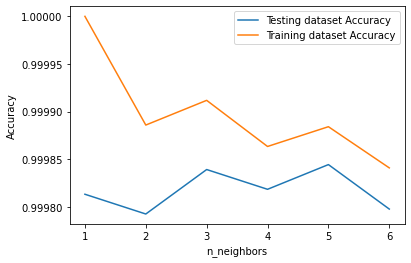

In [8]:
# Loop over K values to see wich model fits the best
for i, k in enumerate(neighbors):# is the index and k the value of the array neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
#We get the accuracy of the training and test models

         
# Compute training and test data accuracy


plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
     
    
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [10]:
print(test_accuracy[5])

0.9997976349230234
